# analyzing the effect of spring forces between nearest neighbors
Tim Tyree<br>
5.24.2021

In [1]:
from lib.my_initialization import *
import random,scipy
from lib.measure.compute_slope import *
from lib.measure.compute_sliding_slope import *
from lib.measure.powerlaw import *
%load_ext autoreload
%autoreload 2

from scipy import stats
alpha=0.1

In [12]:
# For darkmode plots
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

### TODO for run 10
- increase L to 10 (to decrease qmin by a factor of at least 3)

# visualize the effect of varying spring coefficient, $\varkappa$, (varkappa).
- TODO: visualize the effect of turning on/off attractive/repulsive forces.
- TODO: visualize the effect of varying the preferred distance, $x_0>0$.

In [40]:
data_dir="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_9_all.csv"
df=pd.read_csv(data_dir)
df.head()

,x0,varkappa,set_second,reflect,r,no_repulsion,no_attraction,kappa,dt,N,L,Dt,D,CollRate
0,0.0,-5.0,0,0,0.1,0,0,500,0.00001,6,5,0.00001,2,0.020672
1,0.0,-5.0,0,0,0.1,0,0,500,0.00001,6,5,0.00001,20,2.485936
2,0.0,-5.0,0,0,0.1,0,0,500,0.00001,7,5,0.00001,2,0.148025
3,0.0,-5.0,0,0,0.1,0,0,500,0.00001,7,5,0.00001,20,4.438891
4,0.0,-5.0,0,0,0.1,0,0,500,0.00001,8,5,0.00001,2,0.458266


In [41]:
df.columns

Index(['x0', 'varkappa', 'set_second', 'reflect', 'r', 'no_repulsion',
       'no_attraction', 'kappa', 'dt', 'N', 'L', 'Dt', 'D', 'CollRate'],
      dtype='object')

In [42]:
#derived values
# df['CollRate']=1./df['CollTime']
df['A']=df['L']**2
df['q']=df['N']/df['A'] #number of tips per square centimeter
df['w']=df['CollRate']/df['A'] #[mHz?]/cm^2

# df=df[df.niter==250].copy()
#extract column values
r_values=np.array(sorted(set(df.r.values)))#cm
D_values=np.array(sorted(set(df.D.values)))#cm^2/s
L_values=np.array(sorted(set(df.L.values)))#cm
A_values=L_values**2#cm^2
kappa_values=np.array(sorted(set(df.kappa.values)))#1/s
varkappa_values=np.array(sorted(set(df.varkappa.values)))#1/s
x0_values=np.array(sorted(set(df.x0.values)))#1/s
set_second_values=np.array(sorted(set(df.set_second.values)))
reflect_values=np.array(sorted(set(df.reflect.values)))
no_repulsion_values=np.array(sorted(set(df.no_repulsion.values)))
no_attraction_values=np.array(sorted(set(df.no_attraction.values)))

In [43]:
#make test for whether there is one input parameter present in an input DataFrame1
print(r_values)
print(D_values)
print(L_values)
print(kappa_values)
print(varkappa_values)
print(x0_values)
print(set_second_values)
print(reflect_values)
print(no_repulsion_values)
print(no_attraction_values)

[0.1]
[ 2 20]
[5]
[ 500 1500]
[-5.  -1.5 -0.2  0.   0.2  1.5  5. ]
[0.  0.1 0.2 0.3 0.4 0.5 1. ]
[0]
[0]
[0 1]
[0 1]


In [50]:
#query the DataFrame
query =(df.set_second==set_second_values[0])&(df.reflect==reflect_values[0])
query&=df.r==r_values[0]
query&=df.D==D_values[0]
query&=df.L==L_values[0]
query&=df.varkappa==varkappa_values[-1]#5]
query&=df.x0==x0_values[2]
query&=(df.no_repulsion==no_repulsion_values[0])&(df.no_attraction==no_attraction_values[0])
dff=df[query]
kappa_values=np.array(sorted(set(dff.kappa.values)))
dg=dff[dff.kappa==kappa_values[0]]#smaller reaction rate
# dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
# dg=dff.kappa==kappa_values[0]#Fenton-Karma fit

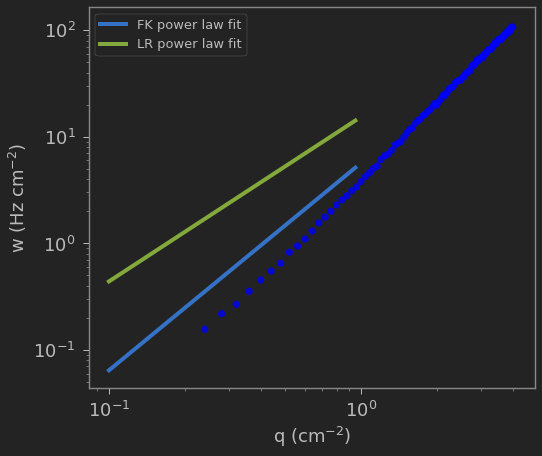

In [51]:
#plot fits for full model
m_fk=1.945;#+-0.030; B_fk=2.441+-0.051
m_lr=1.544;#+-0.034; B_lr=5.870+-0.137
M_fk=5.67;#+-0.39 Hz*cm^{2(m-1)}
M_lr=15.37;#+-1.57 Hz*cm^{2(m-1)}
# RMSE_fk=0.1252 Hz/cm^2
# RMSE_lr=0.0974 Hz/cm^2
# R^2=0.997 (FK)
# R^2=0.994 (LR)
# yscale=10**3
xv=np.arange(0.1,1.,.05)
yv_fk=M_fk*(xv)**m_fk
yv_lr=M_lr*(xv)**m_lr

fontsize=16
# plt.xlim([0.1,1])
# plt.ylim([1e-1,15])
plt.yscale('log')
plt.xscale('log')
plt.plot(xv,yv_fk,label='FK power law fit',zorder=3,lw=4)
plt.plot(xv,yv_lr,label='LR power law fit',zorder=3,lw=4)

x_values=dg.q.values
y_values=dg.w.values
c_values=dg.L.values

fontsize=18
plt.scatter(x_values,y_values,c=c_values,alpha=0.8,cmap='bwr')
# plt.title(u'comparison to simulation\nwith two hybrid modes',fontsize=fontsize)
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-5)
plt.show()

In [54]:
#slice relevant particle density to the particle densities observed from the full model
L=L_values[0]
x_values=dg[dg.L==L].q.values
y_values=dg[dg.L==L].w.values
qmin=0.1;qmax=0.5
boo=(x_values>qmin)&(x_values<qmax)
dict_ci=compute_95CI_ols(np.log(x_values[boo]),np.log(y_values[boo]))
print(*dict_ci)
print(*dict_ci.values())
print(f"Therefore, 95% confidence intervals do not include exponent values observed from the Luo-Rudy model.")

m Delta_m b Delta_b Rsquared
2.0681822921595026 0.08820416673405546 1.0874236066792546 0.0945972019837067 0.9977315756416676
Therefore, 95% confidence intervals do not include exponent values observed from the Luo-Rudy model.


In [55]:
x_values

array([0.24, 0.28, 0.32, 0.36, 0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 , 0.64,
       0.68, 0.72, 0.76, 0.8 , 0.84, 0.88, 0.92, 0.96, 1.  , 1.04, 1.08,
       1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 , 1.44, 1.48, 1.52,
       1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84, 1.88, 1.92, 1.96,
       2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 ,
       2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72, 2.76, 2.8 , 2.84,
       2.88, 2.92, 2.96, 3.  , 3.04, 3.08, 3.12, 3.16, 3.2 , 3.24, 3.28,
       3.32, 3.36, 3.4 , 3.44, 3.48, 3.52, 3.56, 3.6 , 3.64, 3.68, 3.72,
       3.76, 3.8 , 3.84, 3.88, 3.92, 3.96, 4.  ])

In [60]:
#compute sliding m
xavg_values,slope_values,Rsquared_values = compute_sliding_slope_loglog(x_values,y_values,    
    x_min=qmin,
    window_width=2,
    stepsize=None,
)
xavg_values.shape

(48,)

Note: clipping at high particle densities
explains this decreasing exponent...
Decreasing dt to 1e-7 ms fixed this issue
but also required too much cpu time...


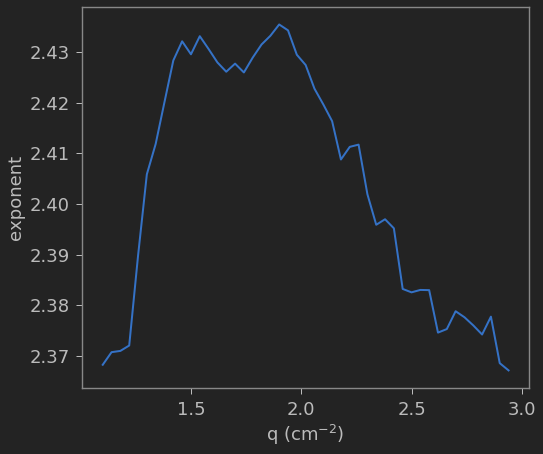

In [61]:
fontsize=18
x=xavg_values[:-1]
# y=Rsquared_values[:-1]
y=slope_values[:-1]
plt.plot(x,y,lw=2)
# plt.scatter(x,y,s=10)
# plt.xlabel('N',fontsize=fontsize)
# plt.ylabel('Collision Rate',fontsize=fontsize)
# plt.xscale('log')
# plt.title(u'comparison to simulation\nwith two hybrid modes',fontsize=fontsize)
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'exponent', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
print(f"""Note: clipping at high particle densities\nexplains this decreasing exponent...
Decreasing dt to 1e-7 ms fixed this issue\nbut also required too much cpu time...""")
plt.show()

# print powerlaw fit of trial modeling LR model for several energy gaps and several D ratios

In [92]:
def slice_df_and_print_powerlaw_fit(r,D,L,varkappa,x0,q_min=0.1,q_max=0.6,no_attraction=0,no_repulsion=0):
    '''map from trial to power law fit in interval q_min to q_max'''
    #query the DataFrame
    query =(df.set_second==set_second_values[0])&(df.reflect==reflect_values[0])
    query&=df.r==r#r_values[0]
    query&=df.D==D#D_values[0]
    query&=df.L==L#L_values[0]
    query&=df.varkappa==varkappa#_values#[-1]#5]
    query&=df.x0==x0#_values[2]
    query&=(df.no_repulsion==no_repulsion)&(df.no_attraction==no_attraction)
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
    dg=dff[dff.kappa==kappa_values[0]]#smaller reaction rate

    x_values=dg.q.values
    y_values=dg.w.values

    # q_min=0.1;q_max=.4
    # boo=(x_values>q_min)&(x_values<q_max)
    # x=np.log(x_values[boo])
    # y=np.log(y_values[boo])
    # dict_out=compute_95CI_ols(x,y)
    # dict_out
    boo=(x_values>q_min)&(x_values<q_max)
    x=x_values[boo]
    y=y_values[boo]
    print_fit_power_law(x,y)

In [93]:
varkappa=varkappa_values[0]
x0=x0_values[0]

r=r_values[0];D=D_values[0];L=L_values[0];
slice_df_and_print_powerlaw_fit(r,D,L,varkappa,x0)

m=7.027+-0.991; B=1.576+-0.207
M= 24.41+-78.69 Hz*cm^{2(m-1)}
RMSE=0.0436 Hz/cm^2
R^2=0.966


In [94]:
r=r_values[0];D=D_values[0];
# varkappa=varkappa_values[0]
x0=x0_values[0]
for varkappa in varkappa_values:#[::2]:
    print(f"for r={r:.3f} cm and D={D} cm^2/s fixed,")
    print(f"the powerlaw fit for varkappa={varkappa} cm and x0={x0} was")
    slice_df_and_print_powerlaw_fit(r,D,L,varkappa,x0)
    print(f'')    

for r=0.100 cm and D=2 cm^2/s fixed,
the powerlaw fit for varkappa=-5.0 cm and x0=0.0 was
m=7.027+-0.991; B=1.576+-0.207
M= 24.41+-78.69 Hz*cm^{2(m-1)}
RMSE=0.0436 Hz/cm^2
R^2=0.966

for r=0.100 cm and D=2 cm^2/s fixed,
the powerlaw fit for varkappa=-1.5 cm and x0=0.0 was
m=3.808+-0.248; B=1.605+-0.104
M= 6.06+-2.72 Hz*cm^{2(m-1)}
RMSE=0.0310 Hz/cm^2
R^2=0.993

for r=0.100 cm and D=2 cm^2/s fixed,
the powerlaw fit for varkappa=-0.2 cm and x0=0.0 was
m=3.165+-0.093; B=1.653+-0.051
M= 4.90+-0.77 Hz*cm^{2(m-1)}
RMSE=0.0161 Hz/cm^2
R^2=0.998

for r=0.100 cm and D=2 cm^2/s fixed,
the powerlaw fit for varkappa=0.0 cm and x0=0.0 was
m=3.033+-0.105; B=1.644+-0.049
M= 4.52+-0.70 Hz*cm^{2(m-1)}
RMSE=0.0141 Hz/cm^2
R^2=0.998

for r=0.100 cm and D=2 cm^2/s fixed,
the powerlaw fit for varkappa=0.2 cm and x0=0.0 was
m=2.973+-0.067; B=1.660+-0.033
M= 4.51+-0.45 Hz*cm^{2(m-1)}
RMSE=0.0090 Hz/cm^2
R^2=0.999

for r=0.100 cm and D=2 cm^2/s fixed,
the powerlaw fit for varkappa=1.5 cm and x0=0.0 was
m=2.64

__Result__
- attractive spring at with x0=0 gave $m \approx 2$... Several values are superquadratic.

In [98]:
import sys

text_fn=data_dir.replace('.csv','_powerfits.txt')
original_stdout = sys.stdout # Save a reference to the original standard output
with open(text_fn, 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    #     r=r_values[1];D=D_values[3];
    for r in r_values:
        for D in D_values:
            for L in L_values:
                for varkappa in varkappa_values:
                    for x0 in x0_values:
                        for no_repulsion in no_repulsion_values:
                            for no_attraction in no_attraction_values:
                                print(f"for r={r:.3f} cm, D={D:.3f} cm^2/s,no_repulsion={no_repulsion==1}, and no_attraction={no_attraction==1} fixed")
                                print(f"the powerlaw fit for varkappa={varkappa} cm and x0={x0} was")
                                slice_df_and_print_powerlaw_fit(r,D,L,varkappa,x0,no_repulsion=no_repulsion,no_attraction=no_attraction)
                                print(f'')

sys.stdout = original_stdout # Reset the standard output to its original value
print(f'output redirected to {text_fn}.')


output redirected to /home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_9_all_powerfits.txt.


__Result__
- no trials exhibited exponent significantly smaller than m<1.9. 
- the robust exponents are still too large to support the LR model, which has m=1.544...

# visualizing beta independence

In [236]:
# r=r_values[0];D=D_values[-1];L=L_values[1]
# shape=shape_values[0]
# for beta in beta_values:#[::2]:
#     #query the DataFrame
#     query=df.r==r
#     query&=df.D==D
#     query&=df.L==L
#     query&=df.beta==beta
#     query&=df['shape']==shape
#     dff=df[query]
#     kappa_values=np.array(sorted(set(dff.kappa.values)))
#     dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
#     # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit

#     x_values=dg.q.values
#     y_values=dg.w.values
#     c_values=dg.beta.values

#     plt.scatter(x_values,y_values,label=r"$\beta =$ "+f"{beta:.3f} cm")#,c=c_values,alpha=0.8,cmap='bwr')

# fontsize=18
# plt.xscale('log')
# plt.yscale('log')
# plt.legend(fontsize=fontsize-2)
# plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
# plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
# plt.tick_params(axis='both', which='major', labelsize=fontsize)
# plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.show()

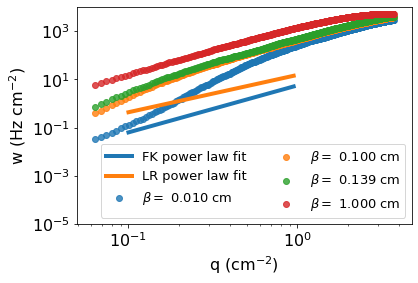

In [237]:
#plot fits for full model
m_fk=1.945;#+-0.030; B_fk=2.441+-0.051
m_lr=1.544;#+-0.034; B_lr=5.870+-0.137
M_fk=5.67;#+-0.39 Hz*cm^{2(m-1)}
M_lr=15.37;#+-1.57 Hz*cm^{2(m-1)}
# RMSE_fk=0.1252 Hz/cm^2
# RMSE_lr=0.0974 Hz/cm^2
# R^2=0.997 (FK)
# R^2=0.994 (LR)
# yscale=10**3
xv=np.arange(0.1,1.,.05)
yv_fk=M_fk*(xv)**m_fk
yv_lr=M_lr*(xv)**m_lr

fontsize=16
# plt.xlim([0.1,1])
# plt.ylim([1e-1,15])
plt.yscale('log')
plt.xscale('log')
plt.plot(xv,yv_fk,label='FK power law fit',zorder=3,lw=4)
plt.plot(xv,yv_lr,label='LR power law fit',zorder=3,lw=4)

#plot data
r=r_values[0];D=D_values[-1];L=L_values[-1]
shape=shape_values[0]
for beta in beta_values:#[::2]:
    #query the DataFrame
    query=df.r==r
    query&=df.D==D
    query&=df.L==L
    query&=df.beta==beta
    query&=df['shape']==shape
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
    dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
    # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit

    x_values=dg.q.values
    y_values=dg.w.values
    c_values=dg.beta.values

    plt.scatter(x_values,y_values,label=r"$\beta =$ "+f"{beta:.3f} cm",alpha=0.8)#,cmap='bwr')

plt.ylim([1e-5,1e4])
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-3,ncol=2,loc='lower right')
plt.show()

In [193]:
#TODO: plot m+-Delta_m versus energy gap for LR and FK model
#plot data
kappa=kappa_values[0]
# r=1.;D=5.;Dratio=1000;L=L_values[-1]
eg_lst=[];m_lst=[];Dm_lst=[];Rsq_lst=[]
for beta in beta_values:
    try:
        #query the DataFrame
        query=df.r==r
        query&=df.D==D
        query&=df.L==L
        query&=df.beta==beta
        query&=df['shape']==shape
        dff=df[query]
        kappa_values=np.array(sorted(set(dff.kappa.values)))
        dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
        # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit
        x_values=dg.q.values
        y_values=dg.w.values

        q_min=0.1;q_max=0.4
        boo=(x_values>q_min)&(x_values<q_max)
        x=x_values[boo]
        y=y_values[boo]

        # print_fit_power_law(x,y)
        B,Delta_B,m,Delta_m,Rsq=fit_power_law(x,y)
        rmse=compute_power_rmse(x,y,m,B)
        M, Delta_M= comp_power_scale(B,Delta_B,m,Delta_m)
    #     print(f"m={m:.3f}+-{Delta_m:.3f}; B={B:.3f}+-{Delta_B:.3f}")
    #     print(f"M=B**m={M:.2f}+-{Delta_M:.2f} Hz*cm^{{2(m-1)}}")
    #     print(f"RMSE={rmse:.4f} Hz/cm^2")
    #     print(f"R^2={Rsq:.3f}")

        eg_lst.append(beta)
        m_lst.append(m)
        Dm_lst.append(Delta_m)
        Rsq_lst.append(Rsq)
    except AssertionError as e:
        pass
print(Rsq_lst)

[0.9993935682244246, 0.9965608521139726, 0.9976978519138612, 0.9996717972874127]


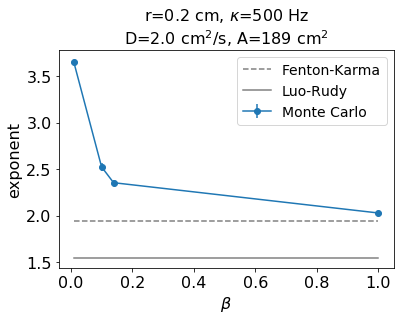

considering 0.1<q<0.4


In [198]:
m_fk=1.945#1.858;#+-0.027; B_fk=2.464+-0.030<br>
m_lr=1.544#1.638;#+-0.017; B_fk=5.588+-0.067
plt.errorbar(eg_lst, m_lst, yerr=Dm_lst, fmt='-o',label='Monte Carlo')
plt.plot(eg_lst, m_fk+0.*np.array(eg_lst), '--',c='gray',label='Fenton-Karma')
plt.plot(eg_lst, m_lr+0.*np.array(eg_lst), '-',c='gray',label='Luo-Rudy')

# plt.scatter(Dtdt_lst,m_lst,marker='^')
# plt.xscale('log')
title=f"r={r:.1f} cm, "+r"$\kappa$="+f"{kappa:.0f} Hz\nD={D} cm"+r"$^2$/s"+f", A={L**2:.0f} cm"+r"$^2$"
plt.title(title,fontsize=fontsize)
plt.xlabel(r'$\beta$',fontsize=fontsize)
plt.ylabel('exponent',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
# plt.xlim([10,50])
# plt.ylim([0.9,2.3])
# plt.grid('on')
plt.legend(fontsize=fontsize-2)
plt.show()
# print("considering 20<N<50 spiral tips")
# print("considering N<20 spiral tips")
print(f"considering {q_min}<q<{q_max}")

# visualizing shape independence

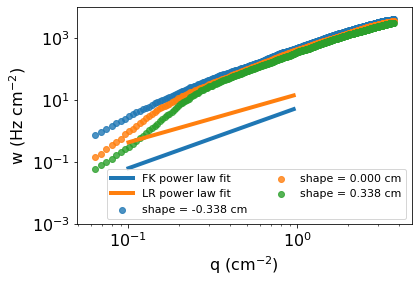

In [202]:
#plot fits for full model
m_fk=1.945;#+-0.030; B_fk=2.441+-0.051
m_lr=1.544;#+-0.034; B_lr=5.870+-0.137
M_fk=5.67;#+-0.39 Hz*cm^{2(m-1)}
M_lr=15.37;#+-1.57 Hz*cm^{2(m-1)}
# RMSE_fk=0.1252 Hz/cm^2
# RMSE_lr=0.0974 Hz/cm^2
# R^2=0.997 (FK)
# R^2=0.994 (LR)
# yscale=10**3
xv=np.arange(0.1,1.,.05)
yv_fk=M_fk*(xv)**m_fk
yv_lr=M_lr*(xv)**m_lr

fontsize=16
# plt.xlim([0.1,1])
# plt.ylim([1e-1,15])
plt.yscale('log')
plt.xscale('log')
plt.plot(xv,yv_fk,label='FK power law fit',zorder=3,lw=4)
plt.plot(xv,yv_lr,label='LR power law fit',zorder=3,lw=4)

#plot data
r=r_values[0];D=D_values[-1];L=L_values[-1]
beta=beta_values[2]
for shape in shape_values:#[::2]:
    #query the DataFrame
    query=df.r==r
    query&=df.D==D
    query&=df.L==L
    query&=df.beta==beta
    query&=df['shape']==shape
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
    dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
    # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit

    x_values=dg.q.values
    y_values=dg.w.values
    plt.scatter(x_values,y_values,label=r"shape = "+f"{shape:.3f} cm",alpha=0.8)#,cmap='bwr')

plt.ylim([1e-3,1e4])
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-5,ncol=2,loc='lower right')
plt.show()

In [204]:
#TODO: plot m+-Delta_m versus energy gap for LR and FK model
#plot data
kappa=kappa_values[0]
# r=1.;D=5.;Dratio=1000;L=L_values[-1]
eg_lst=[];m_lst=[];Dm_lst=[];Rsq_lst=[]
for shape in shape_values:
    try:
        #query the DataFrame
        query=df.r==r
        query&=df.D==D
        query&=df.L==L
        query&=df.beta==beta
        query&=df['shape']==shape
        dff=df[query]
        kappa_values=np.array(sorted(set(dff.kappa.values)))
        dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
        # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit
        x_values=dg.q.values
        y_values=dg.w.values

        q_min=0.1;q_max=0.4
        boo=(x_values>q_min)&(x_values<q_max)
        x=x_values[boo]
        y=y_values[boo]

        # print_fit_power_law(x,y)
        B,Delta_B,m,Delta_m,Rsq=fit_power_law(x,y)
        rmse=compute_power_rmse(x,y,m,B)
        M, Delta_M= comp_power_scale(B,Delta_B,m,Delta_m)
    #     print(f"m={m:.3f}+-{Delta_m:.3f}; B={B:.3f}+-{Delta_B:.3f}")
    #     print(f"M=B**m={M:.2f}+-{Delta_M:.2f} Hz*cm^{{2(m-1)}}")
    #     print(f"RMSE={rmse:.4f} Hz/cm^2")
    #     print(f"R^2={Rsq:.3f}")

        eg_lst.append(shape)
        m_lst.append(m)
        Dm_lst.append(Delta_m)
        Rsq_lst.append(Rsq)
    except AssertionError as e:
        pass
print(Rsq_lst)

[0.9976978519138612, 0.9848489506286213, 0.9853201021654854]


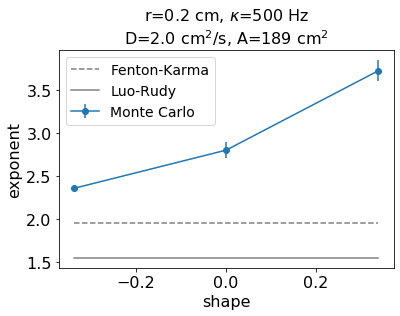

considering 0.1<q<0.4


In [205]:
m_fk=1.945#1.858;#+-0.027; B_fk=2.464+-0.030<br>
m_lr=1.544#1.638;#+-0.017; B_fk=5.588+-0.067
plt.errorbar(eg_lst, m_lst, yerr=Dm_lst, fmt='-o',label='Monte Carlo')
plt.plot(eg_lst, m_fk+0.*np.array(eg_lst), '--',c='gray',label='Fenton-Karma')
plt.plot(eg_lst, m_lr+0.*np.array(eg_lst), '-',c='gray',label='Luo-Rudy')

# plt.scatter(Dtdt_lst,m_lst,marker='^')
# plt.xscale('log')
title=f"r={r:.1f} cm, "+r"$\kappa$="+f"{kappa:.0f} Hz\nD={D} cm"+r"$^2$/s"+f", A={L**2:.0f} cm"+r"$^2$"
plt.title(title,fontsize=fontsize)
plt.xlabel(r'shape',fontsize=fontsize)
plt.ylabel('exponent',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
# plt.xlim([10,50])
# plt.ylim([0.9,2.3])
# plt.grid('on')
plt.legend(fontsize=fontsize-2)
plt.show()
# print("considering 20<N<50 spiral tips")
# print("considering N<20 spiral tips")
print(f"considering {q_min}<q<{q_max}")